In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.datasets import make_gaussian_quantiles

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

#### Parameters:	
__base_estimator__ : object, optional (default=None)
    The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1)

__n_estimators__ : integer, optional (default=50)
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

__learning_rate__ : float, optional (default=1.)
Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

__algorithm__ : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
    If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [2]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)

X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
#y = np.concatenate((y1,  y2 ))

In [3]:
X1.shape, X2.shape

((200, 2), (300, 2))

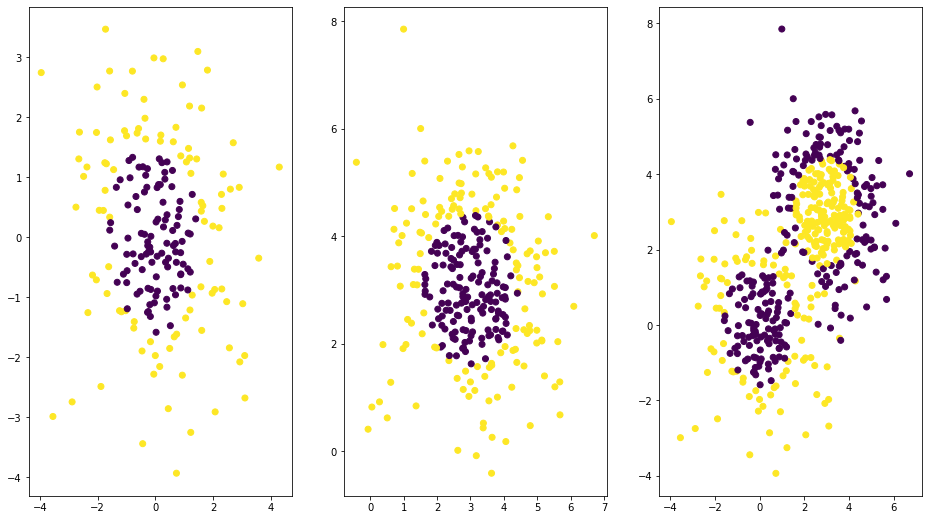

In [4]:
plt.figure(figsize=(16, 9))
plt.subplot(131)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)

plt.subplot(132)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y);

# classify with Adaboost 

In [5]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [6]:
plot_colors = "br"
plot_step   = 0.02
class_names = "AB"

Text(0.5, 1.0, 'Decision Boundary - Adaboost classifier')

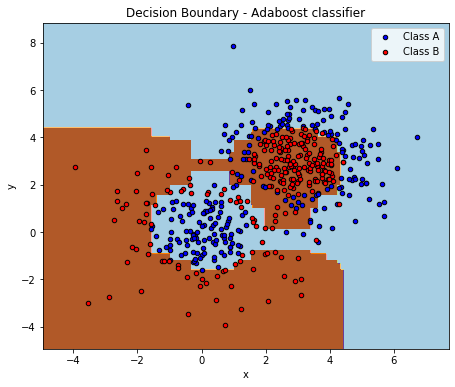

In [7]:
plt.figure(figsize=(16, 6))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, 
                cmap=plt.cm.Paired,
                s=20, 
                edgecolor='k',
                label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary - Adaboost classifier')

# Plot the two-class decision scores
# twoclass_output = bdt.decision_function(X)
# plot_range = (twoclass_output.min(), twoclass_output.max())
# plt.subplot(122)
# for i, n, c in zip(range(2), class_names, plot_colors):
#     plt.hist(twoclass_output[y == i],
#              bins=10,
#              range=plot_range,
#              facecolor=c,
#              label='Class %s' % n,
#              alpha=.5,
#              edgecolor='k')
    
# x1, x2, y1, y2 = plt.axis()
# plt.axis((x1, x2, y1, y2 * 1.2))
# plt.legend(loc='upper right')
# plt.ylabel('Samples')
# plt.xlabel('Score')
# plt.title('Decision Scores')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.35)

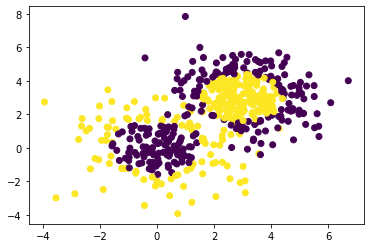

In [9]:
# compare with the decision region (above)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [10]:
y_pred = bdt.predict(X)

print('Accuracy : ', metrics.accuracy_score(y, y_pred))
print('Conf Matrix : \n', metrics.confusion_matrix(y, y_pred))

Accuracy :  0.886
Conf Matrix : 
 [[220  30]
 [ 27 223]]


# Try with simple decision tree

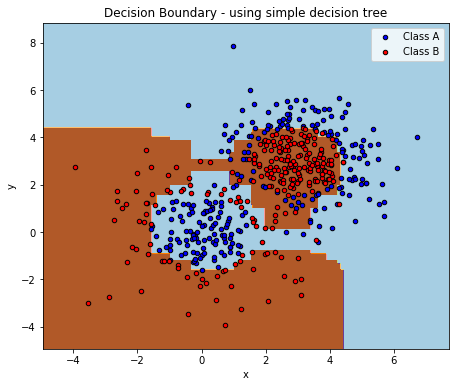

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

plot_colors = "br"
plot_step   = 0.02
class_names = "AB"

plt.figure(figsize=(16, 6))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, 
                cmap=plt.cm.Paired,
                s=20, 
                edgecolor='k',
                label="Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary - using simple decision tree');

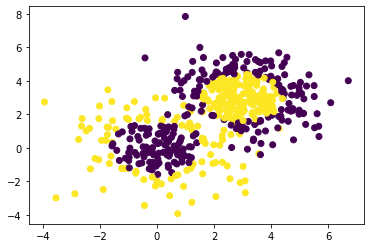

In [12]:
# compare with the decision region (above)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [13]:
y_pred = dt.predict(X)

print('Accuracy : ', metrics.accuracy_score(y, y_pred))
print('Conf Matrix : \n', metrics.confusion_matrix(y, y_pred))

Accuracy :  1.0
Conf Matrix : 
 [[250   0]
 [  0 250]]


# Adaboost regressor

** Parameters:	**

__base_estimator__ : object, optional (default=None)

    The base estimator from which the boosted ensemble is built. Support for sample weighting is required. 
    If None, then the base estimator is DecisionTreeRegressor(max_depth=3)

__n_estimators__ : integer, optional (default=50)

    The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.


In [46]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

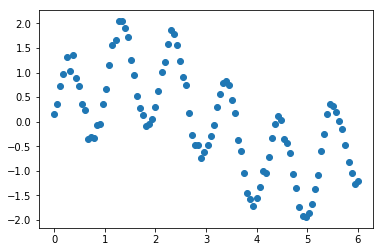

In [47]:
plt.scatter(X, y)

In [48]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x0000021090F450D8>)

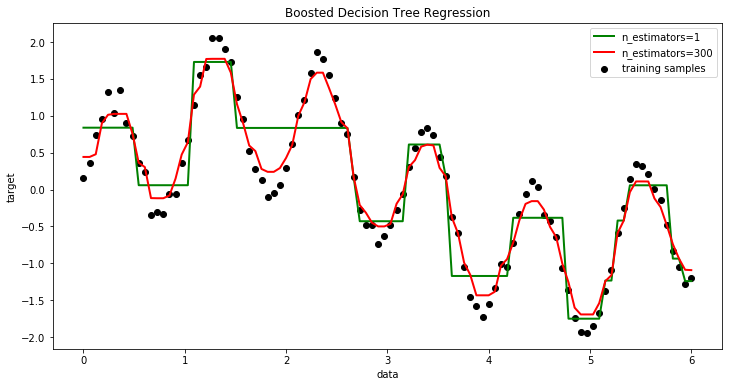

In [51]:
# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend();